In [ ]:
!ls ../content/drive/MyDrive/DL/DL

gtFine	leftImg8bit


In [ ]:
!ls ../content/drive/MyDrive/DL/DL/gtFine  # annotations

test  train  val


In [ ]:
!ls ../content/drive/MyDrive/DL/DL/leftImg8bit  # images

test  train  val


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [ ]:
!python --version

Python 3.7.14


In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113


In [ ]:
!pip3 install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 708 kB 4.9 MB/s 
     |████████████████████████████████| 529 kB 38.6 MB/s 


In [ ]:
!pip3 install segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.7 MB/s 


In [ ]:
!pip3 install segmentation-models-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.0 MB/s 
     |████████████████████████████████| 58 kB 7.2 MB/s 
     |████████████████████████████████| 376 kB 29.9 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=f270147200702334c5b58e67485807acef0e1c35ca070202b49924bd685bb399
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60965 sha256=9bf005134aff43a436b2097a10230b79399709f9dd69ab981004ddb0bb1f5399
  Stored in directory: /root/.cache/pip/wheels/ed/27/e8/9543d42de2740d3544db96aefef63bda3f2c1761b3334f4873
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from torchvision.datasets import Cityscapes
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torch
import torch.nn as nn

From Cityscapes module, taking only train

In [ ]:
df = Cityscapes('../content/drive/MyDrive/DL/DL', split = 'train', mode = 'fine', target_type = 'semantic')

Taking only one image

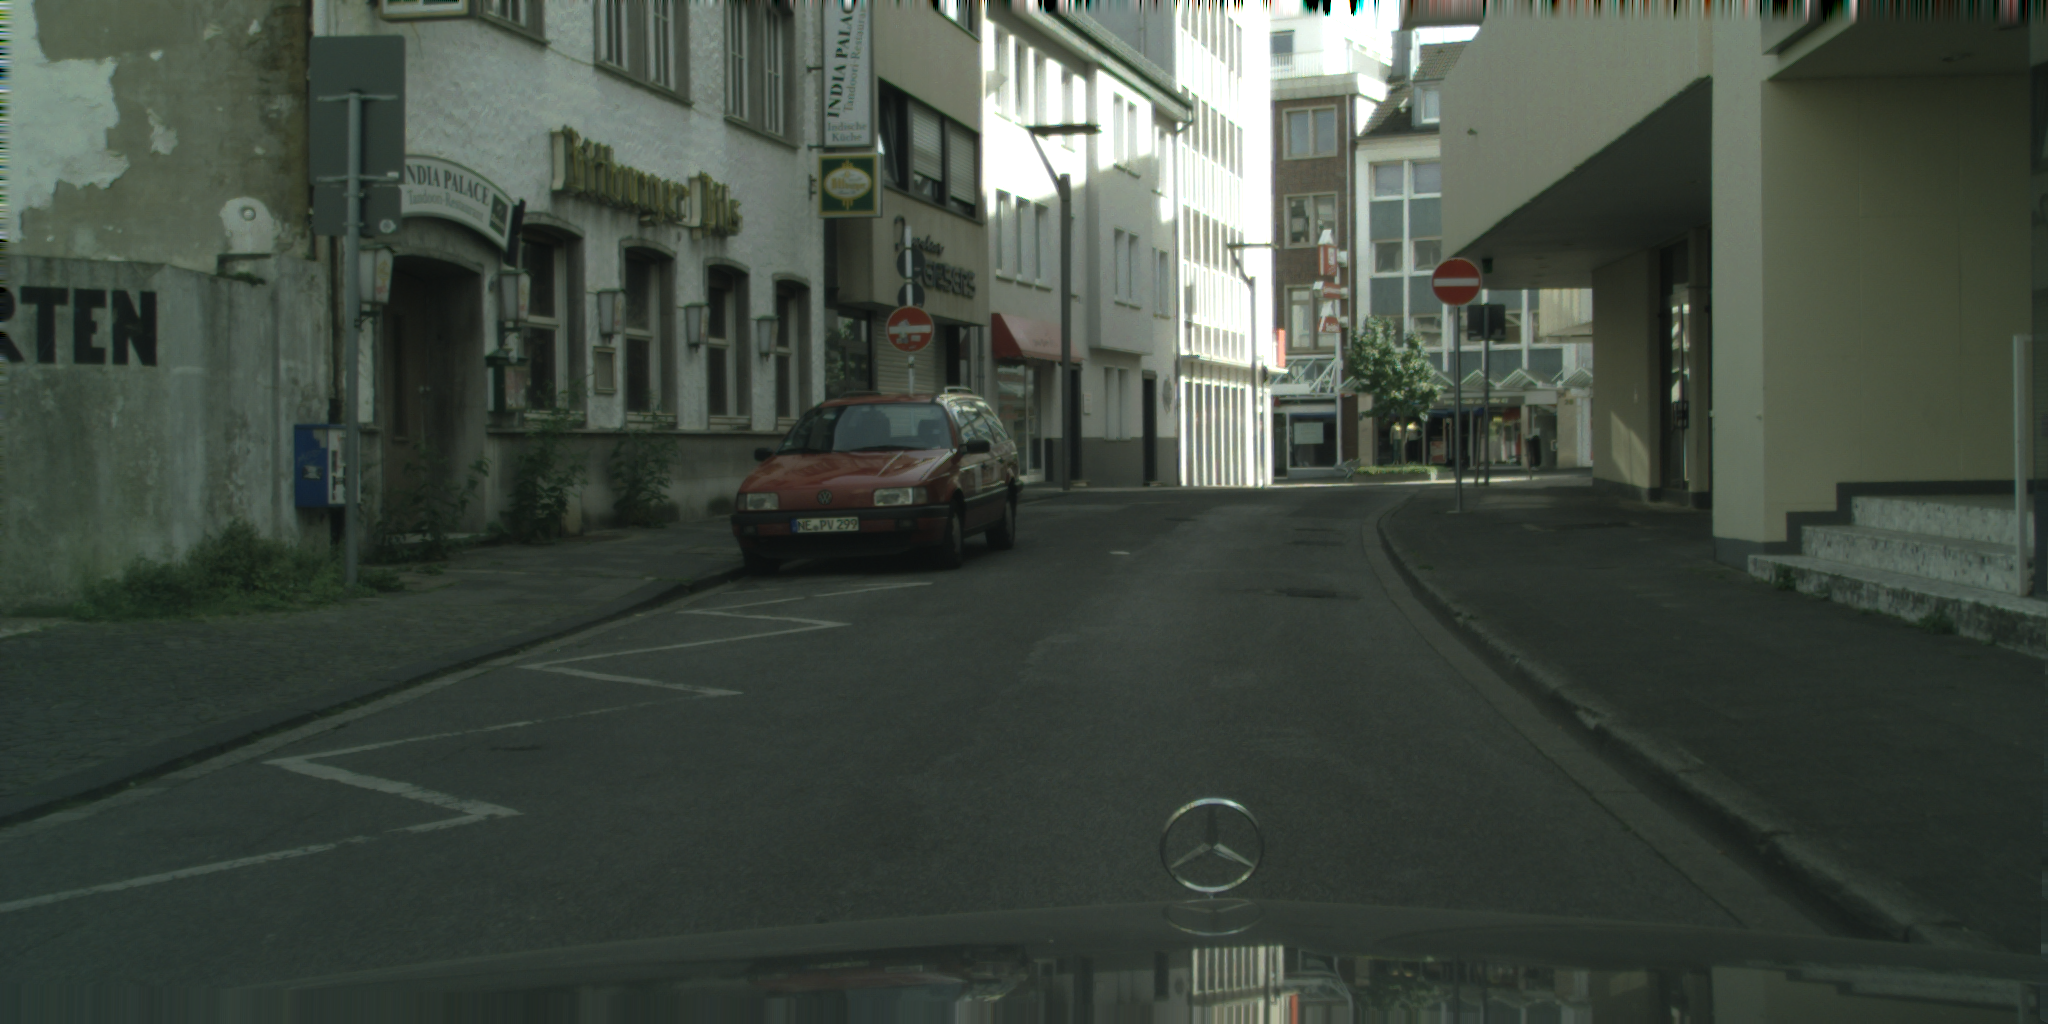

In [ ]:
df[0][0]

In [ ]:
len(df)

2975

Color Image

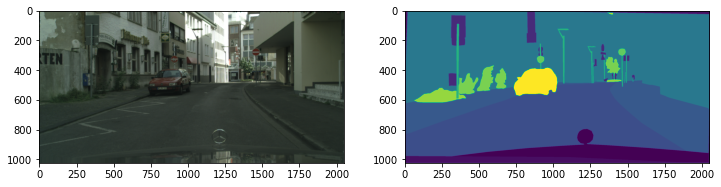

In [ ]:
fig,ax = plt.subplots(ncols = 2, figsize = [12,8])
ax[0].imshow(df[0][0])
ax[1].imshow(df[0][1]) #cmap = 'gray')

Grayscale Image

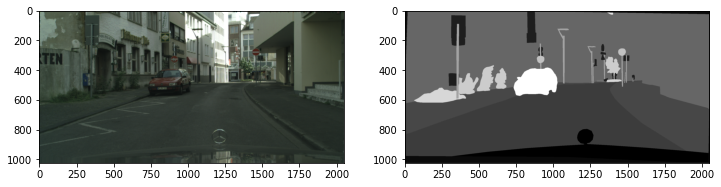

In [ ]:
fig,ax = plt.subplots(ncols = 2, figsize = [12,8])
ax[0].imshow(df[0][0])
ax[1].imshow(df[0][1], cmap = 'gray')

Some useful links from pytorch cityscape module, github cityscape scripts from where I've taken functions, libraries

In [ ]:
# https://pytorch.org/vision/main/_modules/torchvision/datasets/cityscapes.html
# https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers
# https://github.com/mcordts/cityscapesScripts/tree/master

Choosing 20 classes instead of 35 classes

In [ ]:
# https://stackoverflow.com/questions/56650201/how-to-convert-35-classes-of-cityscapes-dataset-to-19-classes/64242989#64242989

In [ ]:
ignore_index=255    # ignoring index 255
void_classes = [0, 1, 2, 3, 4, 5, 6, 9, 10, 14, 15, 16, 18, 29, 30, -1]
valid_classes = [ignore_index,7, 8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33]
class_names = ['unlabelled', 'road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic_light','traffic_sign',
               'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']

n_classes=len(valid_classes)   
print(n_classes)                                         # pritning the length of all valid classes
class_map = dict(zip(valid_classes, range(n_classes)))   # mapping all valid classes from old index to the new one
print(range(n_classes))
(class_map)

20
range(0, 20)


{255: 0,
 7: 1,
 8: 2,
 11: 3,
 12: 4,
 13: 5,
 17: 6,
 19: 7,
 20: 8,
 21: 9,
 22: 10,
 23: 11,
 24: 12,
 25: 13,
 26: 14,
 27: 15,
 28: 16,
 31: 17,
 32: 18,
 33: 19}

In [ ]:
valid_colors = [[0, 0, 0],     #0
        [128, 64, 128],  #1
        [244, 35, 232],  #2
        [70, 70, 70],    #3
        [102, 102, 156], #4
        [190, 153, 153], #5
        [153, 153, 153], #6
        [250, 170, 30],  #7
        [220, 220, 0],   #8
        [107, 142, 35],  #9
        [152, 251, 152], #10
        [70, 130, 180],  #11
        [220, 20, 60],   #12
        [255, 0, 0],     #13
        [0, 0, 142],     #14
        [0, 0, 70],      #15
        [0, 60, 100],    #16
        [0, 80, 100],    #17
        [0, 0, 230],     #18
        [119, 11, 32],   #19
    ]

colours_map = dict(zip(range(n_classes), valid_colors))
colours_map

{0: [0, 0, 0],
 1: [128, 64, 128],
 2: [244, 35, 232],
 3: [70, 70, 70],
 4: [102, 102, 156],
 5: [190, 153, 153],
 6: [153, 153, 153],
 7: [250, 170, 30],
 8: [220, 220, 0],
 9: [107, 142, 35],
 10: [152, 251, 152],
 11: [70, 130, 180],
 12: [220, 20, 60],
 13: [255, 0, 0],
 14: [0, 0, 142],
 15: [0, 0, 70],
 16: [0, 60, 100],
 17: [0, 80, 100],
 18: [0, 0, 230],
 19: [119, 11, 32]}

In [ ]:
def encode_labels(mask):
    #remove unwanted classes and recitify the labels of wanted classes
    for void in void_classes:
        mask[mask == void] = ignore_index
    for valid in valid_classes:
        mask[mask == valid] = class_map[valid]
    return mask

In [ ]:
#converting gray scale to color
def decode_segmap(temp):
    temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = colours_map[l][0]
        g[temp == l] = colours_map[l][1]
        b[temp == l] = colours_map[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0   
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

We use Albumentations to define augmentation pipelines for training and validation datasets. In both pipelines, we first resize an input image. For the training dataset, we also apply more augmentations to that crop. Next, we will normalize an image. We first divide all pixel values of an image by 255, so each pixel's value will lie in a range [0.0, 1.0]. Then we will subtract mean pixel values and divide values by the standard deviation. mean and std in augmentation pipelines are taken from the ImageNet dataset. After that, we will apply ToTensorV2 that converts a NumPy array to a PyTorch tensor, which will serve as an input to a neural network.

In [ ]:
# https://albumentations.ai/docs/examples/pytorch_classification/
import albumentations as A
from albumentations.pytorch import ToTensorV2
transform=A.Compose(
[
    A.Resize(256, 512),
    A.HorizontalFlip(),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(),
]
)

In [ ]:
from typing import Any, Callable, Dict, List, Optional, Union, Tuple
from torchvision.datasets import Cityscapes

class MyClass(Cityscapes):
    def __getitem__(self, index: int) -> Tuple[Any, Any]:  # attaching a metadata string to a tuple object to return the functions value as tuple object
        image = Image.open(self.images[index]).convert('RGB')

        targets: Any = []
        for i, t in enumerate(self.target_type):
            if t == 'polygon':
                target = self._load_json(self.targets[index][i])
            else:
                target = Image.open(self.targets[index][i])
            targets.append(target)
        target = tuple(targets) if len(targets) > 1 else targets[0]

        if self.transforms is not None:
            transformed=transform(image=np.array(image), mask=np.array(target))            
        return transformed['image'],transformed['mask']
    #torch.unsqueeze(transformed['mask'],0)

From Cityscapes module, taking only val

In [ ]:
dataset=MyClass('../content/drive/MyDrive/DL/DL', split='val', mode='fine', target_type='semantic',transforms=transform)
img,seg = dataset[20]
print(img.shape,seg.shape)

torch.Size([3, 256, 512]) torch.Size([256, 512])


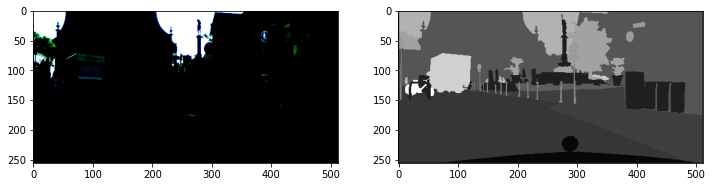

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=1,figsize=(12,8))
ax[0].imshow(img.permute(1, 2, 0))
ax[1].imshow(seg,cmap='gray')

In [ ]:
#class labels before label correction
print(torch.unique(seg))
print(len(torch.unique(seg)))

tensor([ 0,  1,  3,  4,  7,  8, 11, 12, 17, 20, 21, 23, 24, 26, 27, 33],
       dtype=torch.uint8)
16


In [ ]:
#class labels after label correction
res=encode_labels(seg.clone())
print(res.shape)
print(torch.unique(res))
print(len(torch.unique(res)))

torch.Size([256, 512])
tensor([ 0,  1,  2,  3,  4,  6,  8,  9, 11, 12, 14, 15, 19], dtype=torch.uint8)
13


In [ ]:
#coloring
res1=decode_segmap(res.clone())

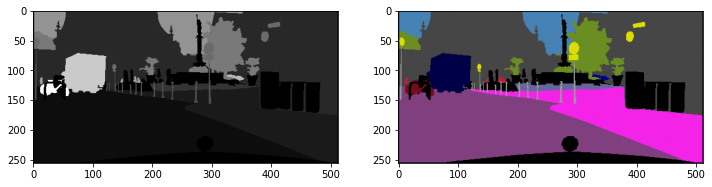

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,10))  
ax[0].imshow(res,cmap='gray')
ax[1].imshow(res1)

In [ ]:
### training

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from pytorch_lightning.callbacks import EarlyStopping,ModelCheckpoint
import segmentation_models_pytorch as smp

In [ ]:
from pytorch_lightning import seed_everything, LightningModule, Trainer
import multiprocessing
import torchmetrics
import torch

In [ ]:
class OurModel(LightningModule):
  def __init__(self):
    super(OurModel,self).__init__()
    #architecute
    self.layer = smp.Unet(
                encoder_name="resnet34",        # choosing encoder,
                encoder_weights="imagenet",     # using 'imagenet' pre-trained weights for encoder initialization
                in_channels=3,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
                classes=n_classes,              # model output channels (number of classes in your dataset)
            )
  
  #parameters
    self.lr=1e-3
    self.batch_size=32
    self.numworker=multiprocessing.cpu_count()//4

    self.criterion= smp.losses.DiceLoss(mode='multiclass')
    #self.metrics = torchmetrics.IoU(num_classes=n_classes)
    self.metric_acc = torchmetrics.Accuracy(average='macro', num_classes = n_classes, mdmc_average = "global") # https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html
    self.metric_f1 = torchmetrics.F1Score(average='macro', num_classes = n_classes, mdmc_average = "global")   # https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html
    self.metric_pre = torchmetrics.Precision(average='macro', num_classes = n_classes, mdmc_average = "global")# https://torchmetrics.readthedocs.io/en/stable/classification/precision.html
    self.metric_rec = torchmetrics.Recall(average='macro', num_classes = n_classes, mdmc_average = "global")   # https://torchmetrics.readthedocs.io/en/stable/classification/recall.html
    
    self.train_class = MyClass('../content/drive/MyDrive/DL/DL', split='train', mode='fine',
                     target_type='semantic',transforms=transform)
    self.val_class = MyClass('../content/drive/MyDrive/DL/DL', split='val', mode='fine',
                     target_type='semantic',transforms=transform)
    
    
  def process(self,image,segment):
    out=self(image)
    segment=encode_labels(segment)
    loss=self.criterion(out,segment.long())
    iou1=self.metric_acc(out,segment)
    iou2=self.metric_f1(out,segment)
    iou3=self.metric_pre(out,segment)
    iou4=self.metric_rec(out,segment)
  
    return loss,iou1,iou2,iou3,iou4
    
  def forward(self,x):
    return self.layer(x)


  def configure_optimizers(self):
    opt=torch.optim.AdamW(self.parameters(), lr=self.lr)
    return opt

  def train_dataloader(self):
    return DataLoader(self.train_class, batch_size=self.batch_size, 
                      shuffle=True,num_workers=self.numworker,pin_memory=True)

  def training_step(self,batch,batch_idx):
    image,segment=batch
    loss,iou1,iou2,iou3,iou4 = self.process(image,segment)
    
    self.log('train_loss', loss,on_step=False, on_epoch=True,prog_bar=True)
    self.log('train_iou1', iou1, on_step=False, on_epoch=True,prog_bar=False)
    self.log('train_iou2', iou2, on_step=False, on_epoch=True,prog_bar=False)
    self.log('train_iou3', iou3, on_step=False, on_epoch=True,prog_bar=False)
    self.log('train_iou4', iou4, on_step=False, on_epoch=True,prog_bar=False)

    return loss

  def val_dataloader(self):
    return DataLoader(self.val_class, batch_size=self.batch_size, 
                      shuffle=False,num_workers=self.numworker,pin_memory=True)
    
  def validation_step(self,batch,batch_idx):
    image,segment=batch
    loss,iou1,iou2,iou3,iou4=self.process(image,segment)
    self.log('val_loss', loss,on_step=False, on_epoch=True,prog_bar=False)
    self.log('val_iou1', iou1, on_step=False, on_epoch=True,prog_bar=False)
    self.log('val_iou2', iou2, on_step=False, on_epoch=True,prog_bar=False)
    self.log('val_iou3', iou3, on_step=False, on_epoch=True,prog_bar=False)
    self.log('val_iou4', iou4, on_step=False, on_epoch=True,prog_bar=False)

    return loss

In [ ]:
model = OurModel()
checkpoint_callback = ModelCheckpoint(monitor='val_loss',dirpath='checkpoints',
                                        filename='file',save_last=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
trainer = Trainer(max_epochs=200, auto_lr_find=False, auto_scale_batch_size=False, # https://pytorch-lightning.readthedocs.io/en/stable/api/pytorch_lightning.trainer.trainer.Trainer.html
                  gpus=1,precision=16,
                  callbacks=[checkpoint_callback],
                 )

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:Using 16bit native Automatic Mixed Precision (AMP)
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.fit(model)
#torch.save(model.state_dict(), 'model.pth')

In [ ]:
model.load_state_dict(torch.load('model.pth'))

In [ ]:
test_class = MyClass('../data/', split='val', mode='fine',
                     target_type='semantic',transforms=transform)
test_loader=DataLoader(test_class, batch_size=12, 
                      shuffle=False)

In [ ]:
model=model.cuda()
model.eval()
with torch.no_grad():
    for batch in test_loader:
        img,seg=batch
        output=model(img.cuda())
        break
print(img.shape,seg.shape,output.shape)  

In [ ]:
from torchvision import transforms
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.255]
)

In [ ]:
sample=6
invimg=inv_normalize(img[sample])
outputx=output.detach().cpu()[sample]
encoded_mask=encode_segmap(seg[sample].clone()) #(256, 512)
decoded_mask=decode_segmap(encoded_mask.clone())  #(256, 512)
decoded_ouput=decode_segmap(torch.argmax(outputx,0))
fig,ax=plt.subplots(ncols=3,figsize=(16,50),facecolor='white')  
ax[0].imshow(np.moveaxis(invimg.numpy(),0,2)) #(3,256, 512)
#ax[1].imshow(encoded_mask,cmap='gray') #(256, 512)
ax[1].imshow(decoded_mask) #(256, 512, 3)
ax[2].imshow(decoded_ouput) #(256, 512, 3)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('Input Image')
ax[1].set_title('Ground mask')
ax[2].set_title('Predicted mask')
plt.savefig('result.png',bbox_inches='tight')